In [72]:
import sys
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install folium geopandas
!{sys.executable} -m pip install mpl_toolkits.basemap
!{sys.executable} -m pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/52/4f/6440a63c9367d981a91de458467eed4a8e259a26f24158071b610a1ed1dd/geopandas-0.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ea/55/61a5d274a210585b5d0c3dac81a82952a4baa7903e3642228d7a465fc340/Shapely-1.7.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/be/04/31d0a6f03943b1684f32c9b861be40c1fd282468fa6bd54ddf4a774e6b0f/Fiona-1.8.13.tar.gz
    Complete output from command python setup.py egg_info:
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in C:\Users\ADMINI~1\AppData\Local\Temp\pip-install-ix_tvits\fiona\


  Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: )
No matching distribution found for mpl_toolkits.basemap


In [59]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [4]:
# Creating Engine

database_path="data/wildfires.sqlite"
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()


In [5]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM fires", conn)

In [6]:
data.head()


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
data.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [9]:
data.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,9.402330e+05,5.484020e+07,2.003710e+03,2.453064e+06,1.647191e+02,5.979037e+00,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,5.428436e+05,1.011963e+08,6.663099e+00,2.434573e+03,9.003891e+01,3.483860e+00,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,4.701170e+05,5.055000e+05,1.998000e+03,2.451084e+06,8.900000e+01,3.000000e+00,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,9.402330e+05,1.067761e+06,2.004000e+03,2.453178e+06,1.640000e+02,5.000000e+00,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,9.000000e+00,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,1.300000e+01,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


In [10]:
wildfires_cleaned=data[["SOURCE_REPORTING_UNIT_NAME","FIRE_NAME","FIRE_YEAR","DISCOVERY_DATE","DISCOVERY_DOY","STAT_CAUSE_DESCR","CONT_DATE","CONT_DOY","FIRE_SIZE","FIRE_SIZE_CLASS","LATITUDE","LONGITUDE","STATE","COUNTY","Shape"]]
wildfires_cleaned.head()

,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,Shape
0,Plumas National Forest,FOUNTAIN,2005,2453403.5,33,Miscellaneous,2453403.5,33.0,0.10,A,40.036944,-121.005833,CA,63,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,Eldorado National Forest,PIGEON,2004,2453137.5,133,Lightning,2453137.5,133.0,0.25,A,38.933056,-120.404444,CA,61,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,Eldorado National Forest,SLACK,2004,2453156.5,152,Debris Burning,2453156.5,152.0,0.10,A,38.984167,-120.735556,CA,17,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,Eldorado National Forest,DEER,2004,2453184.5,180,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.913333,CA,3,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,Eldorado National Forest,STEVENOT,2004,2453184.5,180,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.933056,CA,3,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [11]:
fires = wildfires_cleaned.rename(columns={"SOURCE_REPORTING_UNIT_NAME":"UNIT_NAME", "STAT_CAUSE_DESCR":"CAUSE_DESCR","FIRE_SIZE_CLASS":"FIRE_CLASS"})
fires.head()

,UNIT_NAME,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,Shape
0,Plumas National Forest,FOUNTAIN,2005,2453403.5,33,Miscellaneous,2453403.5,33.0,0.10,A,40.036944,-121.005833,CA,63,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,Eldorado National Forest,PIGEON,2004,2453137.5,133,Lightning,2453137.5,133.0,0.25,A,38.933056,-120.404444,CA,61,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,Eldorado National Forest,SLACK,2004,2453156.5,152,Debris Burning,2453156.5,152.0,0.10,A,38.984167,-120.735556,CA,17,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,Eldorado National Forest,DEER,2004,2453184.5,180,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.913333,CA,3,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,Eldorado National Forest,STEVENOT,2004,2453184.5,180,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.933056,CA,3,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [12]:
fires.sample(n=100)

,UNIT_NAME,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,Shape
496329,Minnesota Department of Natural Resources,None,1994,2449460.5,108,Arson,NaN,NaN,7.00,B,47.172332,-95.689317,MN,Mahnomen,b'\x00\x01\xad\x10\x00\x00\xe8\xe4\x0c\xc5\x1d...
570147,PAS District 17,None,2006,2453811.5,76,Children,NaN,NaN,0.75,B,40.283330,-76.000000,PA,Berks,b'\x00\x01\xad\x10\x00\x00\xfc\xff\xff\xff\xff...
963430,FLS Tallahassee Forestry Center,None,1993,2449090.5,103,Railroad,NaN,NaN,25.00,C,30.251900,-84.135000,FL,Wakula,b'\x00\x01\xad\x10\x00\x00l=\n\xd7\xa3\x08U\xc...
163534,Shoshone National Forest,HARDPAN,2003,2452867.5,228,Lightning,2452868.5,229.0,3.00,B,44.351667,-109.496944,WY,None,b'\x00\x01\xad\x10\x00\x00\xa8n\r\xf0\xcd_[\xc...
932252,TNS Unit 2,None,2001,2452210.5,301,Debris Burning,NaN,NaN,0.10,A,35.845000,-83.928300,TN,None,b'\x00\x01\xad\x10\x00\x00\x1c8gDi\xfbT\xc0`\x...
391919,Arizona State Forestry Division - State Office,None,2005,2453632.5,262,Smoking,NaN,NaN,0.27,B,35.255357,-113.169687,AZ,None,b'\x00\x01\xad\x10\x00\x00\x8cWZ%\xdcJ\\\xc0\x...
1316072,West Virginia Division of Forestry,MALDEN MOUNTAIN,2003,2452744.5,105,Arson,2452744.5,105.0,1.00,B,38.276035,-81.525601,WV,Kanawha,b'\x00\x01\xad\x10\x00\x00p\x89\nr\xa3aT\xc0\x...
500659,Minnesota Department of Natural Resources,None,1997,2450562.5,114,Debris Burning,NaN,NaN,0.10,A,47.759676,-92.822754,MN,St. Louis,b'\x00\x01\xad\x10\x00\x00\xcc\xa9d\x00\xa84W\...
1162539,AFC Selma,None,2006,2453863.5,128,Debris Burning,2453863.5,128.0,2.00,B,32.518996,-87.381261,AL,Perry,b'\x00\x01\xad\x10\x00\x00\\\x8f\x89\x94f\xd8U...
1640815,Cherokee National Forest,MISTLETOE 2,2013,2456644.5,352,Arson,2456645.5,353.0,2.00,B,36.216389,-82.126389,TN,019,"b'\x00\x01\xad\x10\x00\x00,Hm\xc1\x16\x88T\xc0..."


In [13]:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
## Check how many are missing by column, and then check which ones have any missing values
print(fires.apply(num_missing, axis=0).where(lambda x : x != 0).dropna().head(20))

Missing values per column:
FIRE_NAME    957189.0
CONT_DATE    891531.0
CONT_DOY     891531.0
COUNTY       678148.0
dtype: float64


In [14]:
print(fires.dtypes)

UNIT_NAME          object
FIRE_NAME          object
FIRE_YEAR           int64
DISCOVERY_DATE    float64
DISCOVERY_DOY       int64
CAUSE_DESCR        object
CONT_DATE         float64
CONT_DOY          float64
FIRE_SIZE         float64
FIRE_CLASS         object
LATITUDE          float64
LONGITUDE         float64
STATE              object
COUNTY             object
Shape              object
dtype: object


In [15]:
#removing FIRE_NAME because it may not be important to name a fire everytime
del fires ["FIRE_NAME"]


In [16]:
fires.head()

,UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,Shape
0,Plumas National Forest,2005,2453403.5,33,Miscellaneous,2453403.5,33.0,0.10,A,40.036944,-121.005833,CA,63,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,Eldorado National Forest,2004,2453137.5,133,Lightning,2453137.5,133.0,0.25,A,38.933056,-120.404444,CA,61,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,Eldorado National Forest,2004,2453156.5,152,Debris Burning,2453156.5,152.0,0.10,A,38.984167,-120.735556,CA,17,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,Eldorado National Forest,2004,2453184.5,180,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.913333,CA,3,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,Eldorado National Forest,2004,2453184.5,180,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.933056,CA,3,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [71]:
print("Missing values per column:")
## Check how many are missing by column, and then check which ones have any missing values
print(fires.apply(num_missing, axis=0).where(lambda x : x != 0).dropna().head(20))

Missing values per column:
CONT_DATE    891531.0
CONT_DOY     891531.0
COUNTY       678148.0
dtype: float64


In [79]:
def julianDateToDate(jDate):
     _jdatere = re.compile("(?P<year>\d{4})(?P<days>\d{3})")
     match =_jdatere.match(jDate)
     if match:
          d = match.groupdict()
          year = int(d["year"])
          days = int(d["days"])
          date = datetime.date(year,1,1) + datetime.timedelta(days=days-1)
          return date

In [17]:
fires.head()

,UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,Shape
0,Plumas National Forest,2005,2453403.5,33,Miscellaneous,2453403.5,33.0,0.10,A,40.036944,-121.005833,CA,63,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,Eldorado National Forest,2004,2453137.5,133,Lightning,2453137.5,133.0,0.25,A,38.933056,-120.404444,CA,61,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,Eldorado National Forest,2004,2453156.5,152,Debris Burning,2453156.5,152.0,0.10,A,38.984167,-120.735556,CA,17,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,Eldorado National Forest,2004,2453184.5,180,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.913333,CA,3,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,Eldorado National Forest,2004,2453184.5,180,Lightning,2453189.5,185.0,0.10,A,38.559167,-119.933056,CA,3,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


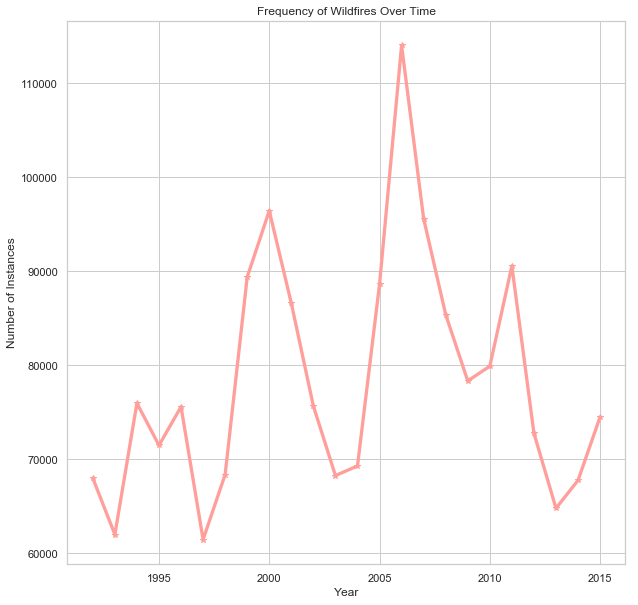

In [35]:
df_year = fires[['FIRE_YEAR']]
df_year['FIRE_YEAR'].value_counts(sort=False).plot(kind="line",marker='*',figsize=(10,10), color='r', linewidth=3.3)
plt.title('Frequency of Wildfires Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Instances')
plt.show()

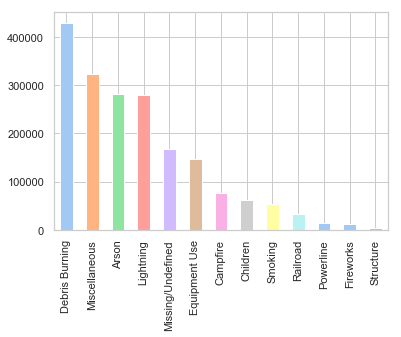

In [49]:
fires["CAUSE_DESCR"].value_counts().plot(kind="bar")

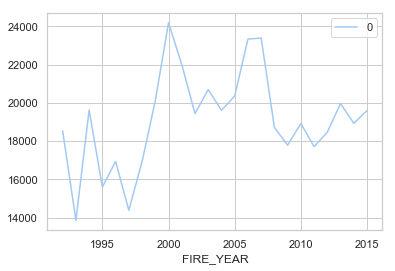

In [56]:
size_per_year=fires.groupby(['FIRE_YEAR','FIRE_SIZE']).size().reset_index().groupby('FIRE_YEAR')[[0]].max()
size_per_year.plot()